# keras simple cnn on cifar10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
print(x_test.shape, x_test.dtype)
print(y_test.shape, y_test.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int64


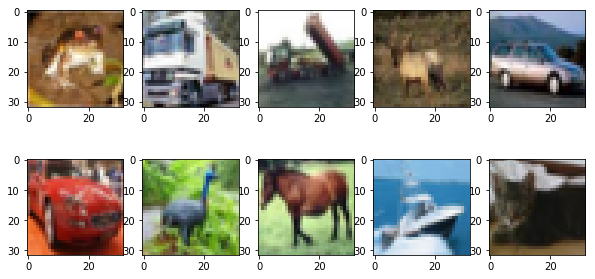

In [4]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(x_train[i])

In [5]:
import keras
y_train = keras.utils.to_categorical(y_train, 10) # one hot encoding
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
x_train = x_train.astype('float32')
x_train /= 255 # scale to 0-1
x_test = x_test.astype('float32')
x_test /= 255

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D

filters = 32
kernel_size = 5
strides = 1
pool_size = 2

model = Sequential()
model.add(Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='valid',
                 activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='valid',
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               80100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
__________

In [8]:
# reduce train, test size for time saving
idx = np.random.choice(50000, 5000, replace=False)
x_train = x_train[idx]
y_train = y_train[idx]
idx = np.random.choice(10000, 1000, replace=False)
x_test = x_test[idx]
y_test = y_test[idx]

print(x_train.shape)
print(x_test.shape)

(5000, 32, 32, 3)
(1000, 32, 32, 3)


In [9]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Train on 5000 samples, validate on 1000 samples
Epoch 1/5
5000/5000 [==============================] - 10s - loss: 2.1549 - acc: 0.1904 - val_loss: 1.8943 - val_acc: 0.2960